### 패키지 호출

In [ ]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 통계 학습을 위한 패키지
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 기계 학습을 위한 패키지
import sklearn.linear_model
from sklearn.model_selection import train_test_split

# 시각화를 위한 패키지
from matplotlib import pyplot as plt
import seaborn as sns

# 그래프를 실제로 그리기 위한 설정
%matplotlib inline

### 데이터 불러오기

In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
df = pd.read_csv('bike_train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# casual, registered는 target인 count와 겹치므로 column에서 제거해준다.
drop_df = df.drop(['casual', 'registered','datetime'], axis = 1)
drop_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,0,1,9.84,14.395,81,0.0,16
1,1,0,0,1,9.02,13.635,80,0.0,40
2,1,0,0,1,9.02,13.635,80,0.0,32
3,1,0,0,1,9.84,14.395,75,0.0,13
4,1,0,0,1,9.84,14.395,75,0.0,1


### EDA 진행

In [ ]:
nCar = len(drop_df.index)
nVar = len(drop_df.columns)

print(nCar)
print(nVar)

10886
9


In [ ]:
# NaN 값이 있으면 boxplot이 그려지지 않기 때문에 NaN값이 있는지 확인 후 있으면 해당 행을 제거해준다.
drop_df.isnull().sum()

# 다행히 모든 데이터셋에서 null이 없음을 확인할 수 있었다.

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

### boxplot


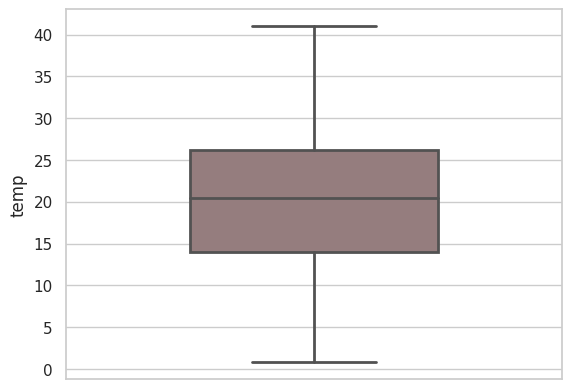

In [ ]:
import seaborn as sns
sns.set_theme(style='whitegrid')
 
## 수직 박스 플롯
ax = sns.boxplot(y=df['temp'],
                 color='r', # 박스 색상
                 width=0.5, # 박스 폭 0~1
                 fliersize=5, # 아웃라이어 마커 사이즈
                 linewidth=2, # 라인 두꼐
                 saturation=0.2 # 색상 채도 0~1
                )

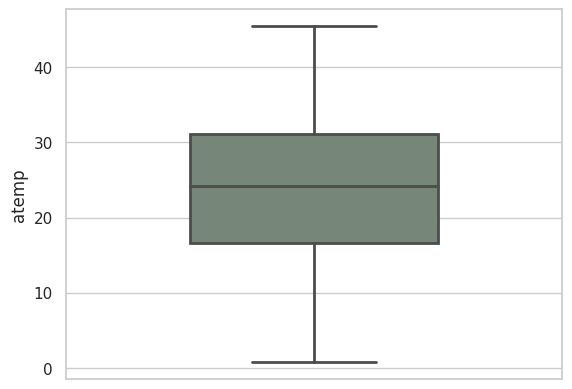

In [ ]:
## 수직 박스 플롯
ax = sns.boxplot(y=drop_df['atemp'],
                 color='g', # 박스 색상
                 width=0.5, # 박스 폭 0~1
                 fliersize=5, # 아웃라이어 마커 사이즈
                 linewidth=2, # 라인 두꼐
                 saturation=0.2 # 색상 채도 0~1
                )

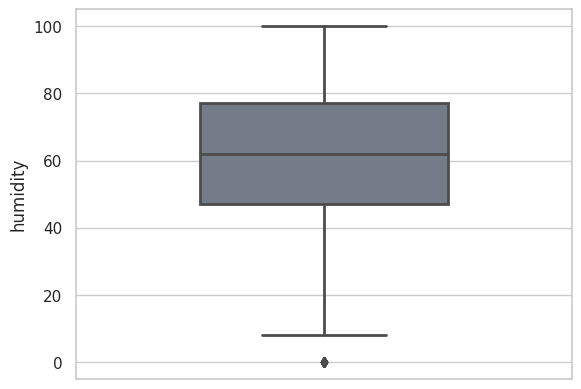

In [ ]:
## 수직 박스 플롯
ax = sns.boxplot(y=drop_df['humidity'],
                 color='b', # 박스 색상
                 width=0.5, # 박스 폭 0~1
                 fliersize=5, # 아웃라이어 마커 사이즈
                 linewidth=2, # 라인 두꼐
                 saturation=0.2 # 색상 채도 0~1
                )

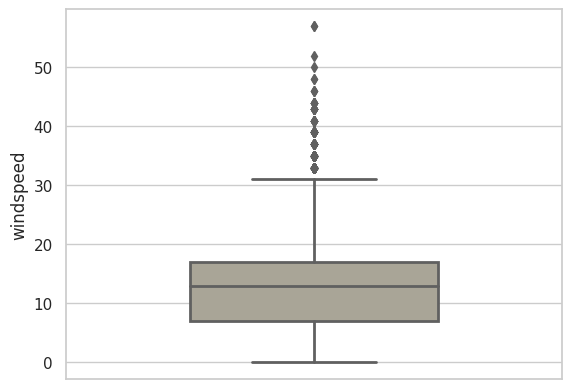

In [ ]:
## 수직 박스 플롯
ax = sns.boxplot(y=drop_df['windspeed'],
                 color='y', # 박스 색상
                 width=0.5, # 박스 폭 0~1
                 fliersize=5, # 아웃라이어 마커 사이즈
                 linewidth=2, # 라인 두꼐
                 saturation=0.2 # 색상 채도 0~1
                )

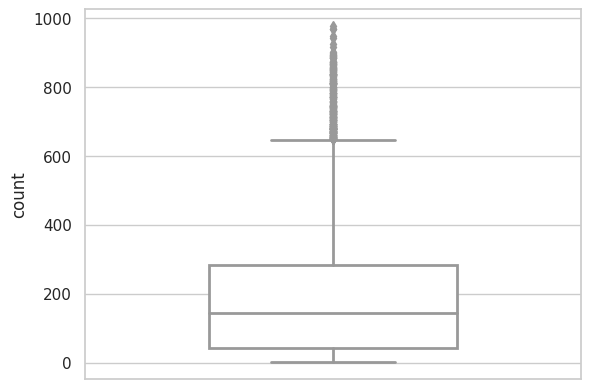

In [ ]:
## 수직 박스 플롯
ax = sns.boxplot(y=drop_df['count'],
                 color='w', # 박스 색상
                 width=0.5, # 박스 폭 0~1
                 fliersize=5, # 아웃라이어 마커 사이즈
                 linewidth=2, # 라인 두꼐
                 saturation=0.2 # 색상 채도 0~1
                )

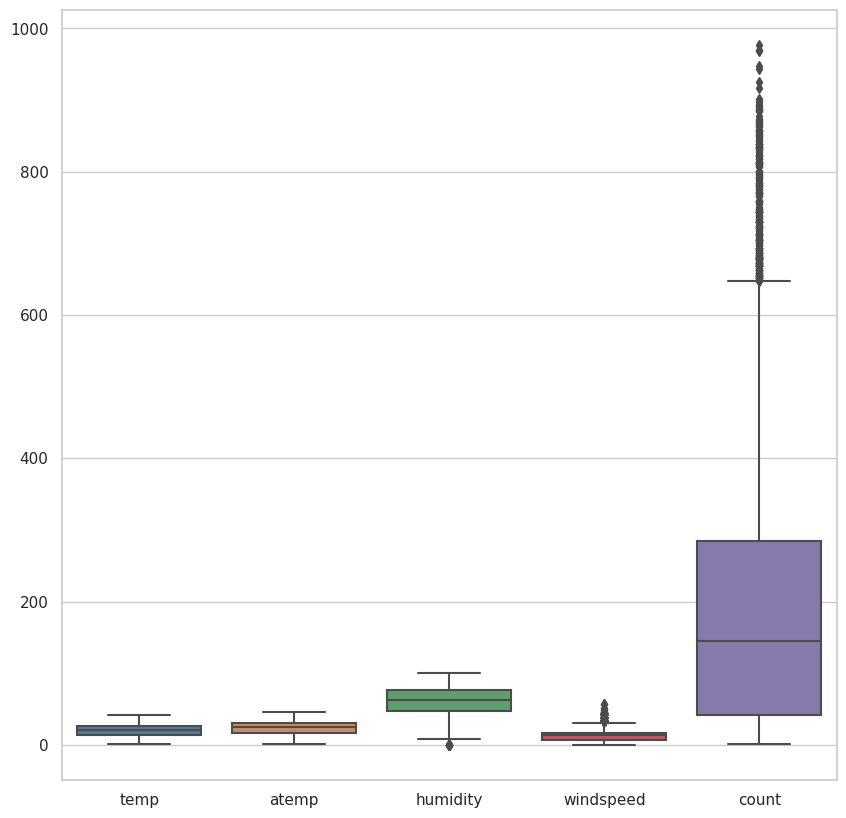

In [ ]:
# numerical 변수들의 box plot 확인
# 총 5개 column이 있으므로 column의 boxplot을 한번에 확인
sns.boxplot(data=drop_df[['temp',
       'atemp', 'humidity', 'windspeed','count']])
fig=plt.gcf()
fig.set_size_inches(10,10)

### 이상치 제거 IQR 방식 활용


참고 : https://bigdaheta.tistory.com/82

In [ ]:
Q1 = drop_df[["temp", "atemp","humidity", "windspeed", "count"]].quantile(q=0.25)
Q3 = drop_df[["temp", "atemp","humidity", "windspeed", "count"]].quantile(q=0.75)
print(Q1)
print(Q3)

temp         13.9400
atemp        16.6650
humidity     47.0000
windspeed     7.0015
count        42.0000
Name: 0.25, dtype: float64
temp          26.2400
atemp         31.0600
humidity      77.0000
windspeed     16.9979
count        284.0000
Name: 0.75, dtype: float64


In [ ]:
IQR = Q3-Q1
IQR

temp          12.3000
atemp         14.3950
humidity      30.0000
windspeed      9.9964
count        242.0000
dtype: float64

In [ ]:
IQR_df = drop_df[(drop_df['temp'] <= Q3['temp']+1.5*IQR['temp']) & (drop_df['temp'] >= Q1['temp']-1.5*IQR['temp'])]
IQR_df = IQR_df[(IQR_df['atemp'] <= Q3['atemp']+1.5*IQR['atemp']) & (IQR_df['atemp'] >= Q1['atemp']-1.5*IQR['atemp'])]
IQR_df = IQR_df[(IQR_df['humidity'] <= Q3['humidity']+1.5*IQR['humidity']) & (IQR_df['humidity'] >= Q1['humidity']-1.5*IQR['humidity'])]
IQR_df = IQR_df[(IQR_df['windspeed'] <= Q3['windspeed']+1.5*IQR['windspeed']) & (IQR_df['windspeed'] >= Q1['windspeed']-1.5*IQR['windspeed'])]
IQR_df = IQR_df[(IQR_df['count'] <= Q3['count']+1.5*IQR['count']) & (IQR_df['count'] >= Q1['count']-1.5*IQR['count'])]


IQR_df = IQR_df[["temp", "atemp","humidity", "windspeed", "count"]]

print('original_df :', len(drop_df))
print('IQR_df :', len(IQR_df))

original_df : 10886
IQR_df : 10348


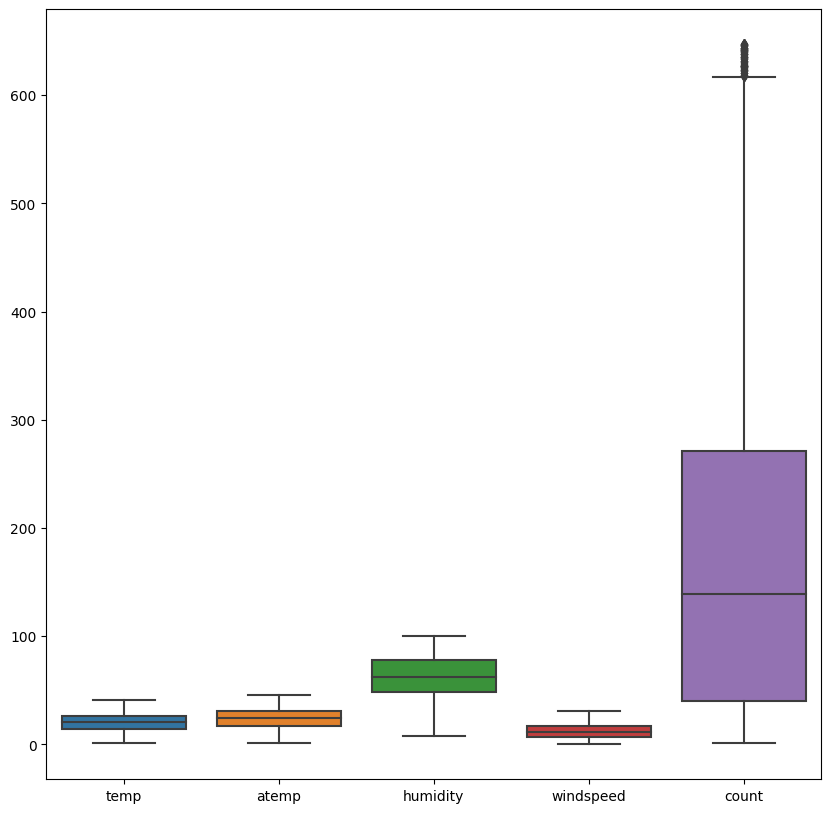

In [ ]:
# outlier 제거 후 box plot

sns.boxplot(data=IQR_df[['temp',
       'atemp', 'humidity', 'windspeed','count']])
fig=plt.gcf()
fig.set_size_inches(10,10)

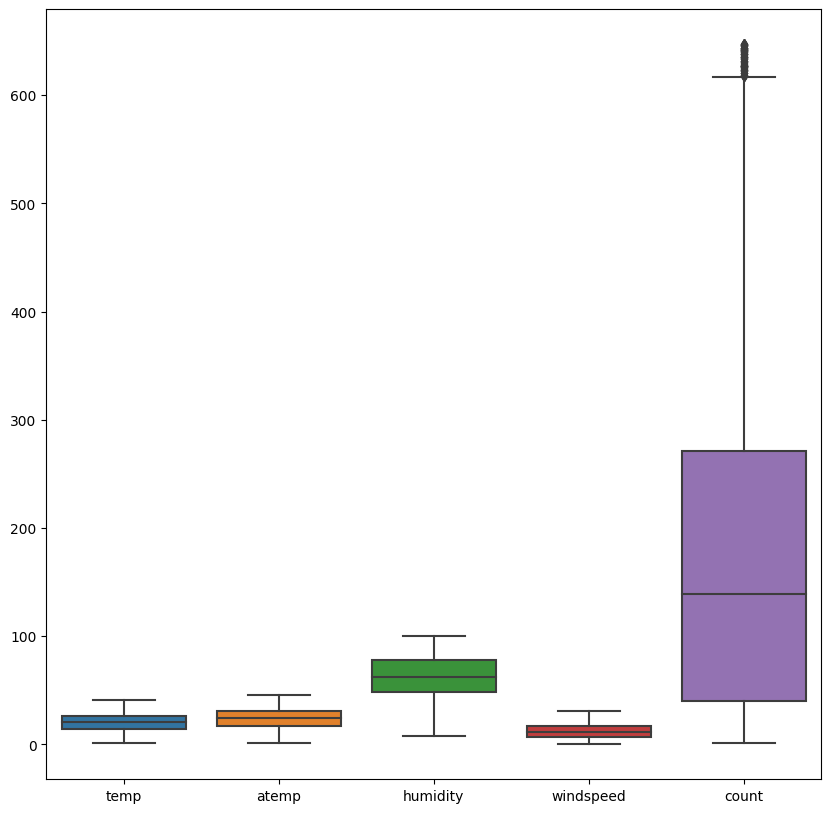

In [ ]:
# IQR 기법으로 이상치 제거 후 box plot

sns.boxplot(data=IQR_df[['temp',
       'atemp', 'humidity', 'windspeed','count']])
fig=plt.gcf()
fig.set_size_inches(10,10)

In [ ]:
# 기술 통계를 살펴본다.

# 중간값, 결측치, 왜도, 첨도 표시
df_stats = drop_df.describe().T

skew_results = []
kurtosis_results = []
null_results = []
median_results = []

for idx, val in enumerate(df_stats.index):
    median_results.append(drop_df[val].median())
    skew_results.append(drop_df[val].skew())
    kurtosis_results.append(drop_df[val].kurtosis())
    null_results.append(drop_df[val].isnull().sum())  

df_stats['median'] = median_results
df_stats['missing'] = null_results
df_stats['skewness'] = skew_results
df_stats['kurtosis'] = kurtosis_results
df_stats

,count,mean,std,min,25%,50%,75%,max,median,missing,skewness,kurtosis
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000,3.000,0,-0.007076,-1.355661
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000,0.000,0,5.660517,30.046975
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000,1.000,0,-0.776163,-1.397828
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000,1.000,0,1.243484,0.395533
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000,20.500,0,0.003691,-0.914530
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550,24.240,0,-0.102560,-0.850076
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000,62.000,0,-0.086335,-0.759818
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969,12.998,0,0.588767,0.630133
count,10886.0,191.574132,181.144454,1.00,42.0000,145.000,284.0000,977.0000,145.000,0,1.242066,1.300093


### qq-plot

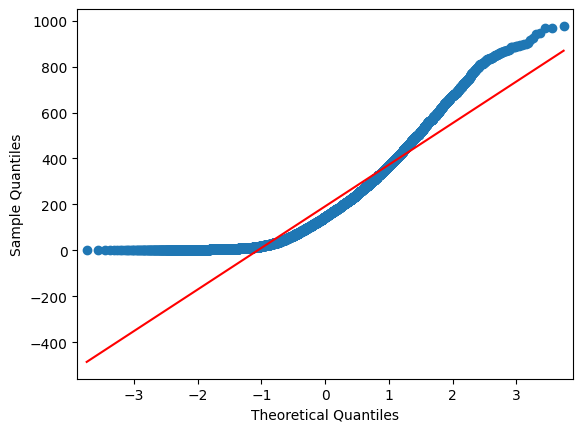

In [ ]:
# Q-Q 도표
qqplot = sm.qqplot(drop_df['count'], line = "s")

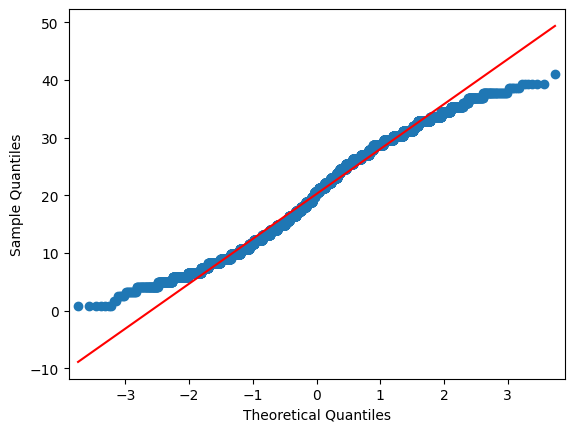

In [ ]:
qqplot = sm.qqplot(drop_df['temp'], line = "s")

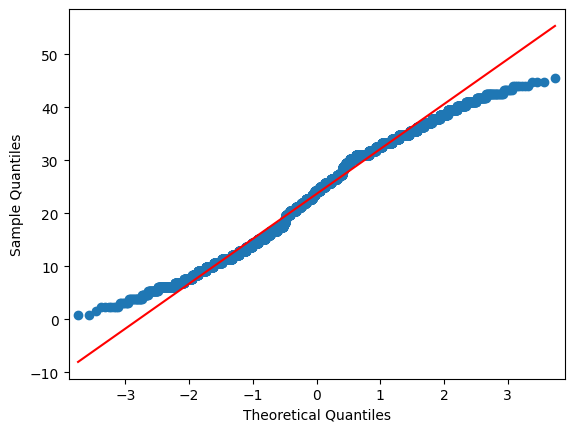

In [ ]:
qqplot = sm.qqplot(drop_df['atemp'], line = "s")

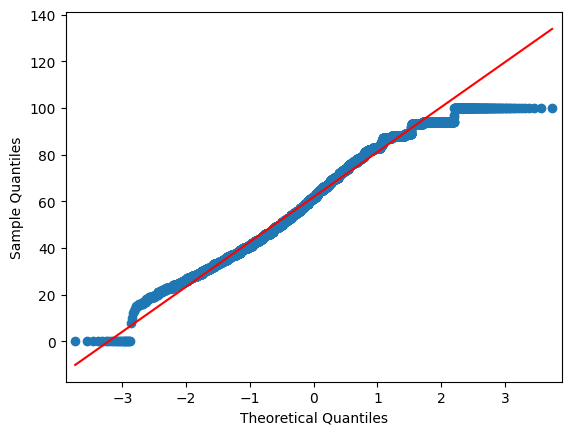

In [ ]:

qqplot = sm.qqplot(drop_df['humidity'], line = "s")

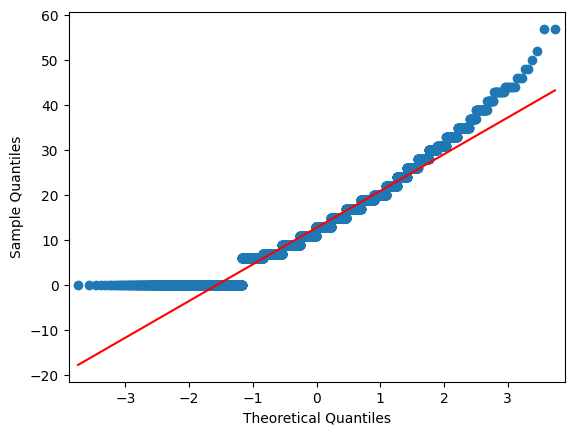

In [ ]:

qqplot = sm.qqplot(drop_df['windspeed'], line = "s")

###normal curve over histogram of A

<ipython-input-19-1e42169831c7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(drop_df['count'])


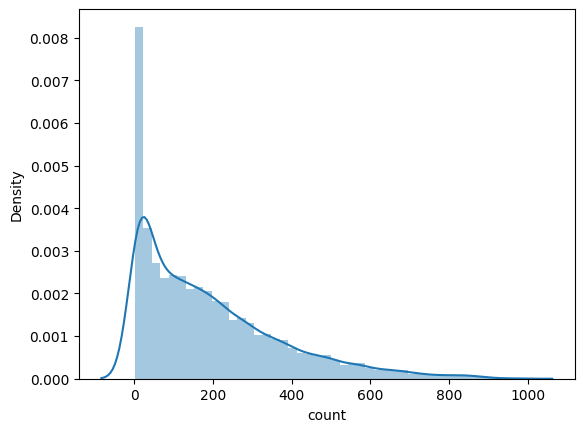

In [ ]:
sns.distplot(drop_df['count'])
plt.show()

<ipython-input-20-e4a5e8e3c917>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(drop_df['temp'])


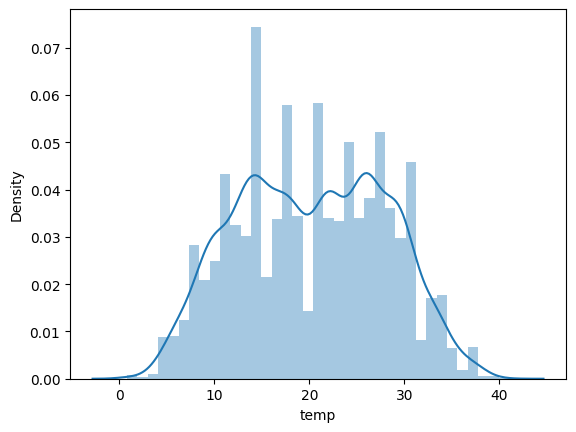

In [ ]:
sns.distplot(drop_df['temp'])
plt.show()

<ipython-input-21-cd13548da06f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(drop_df['atemp'])


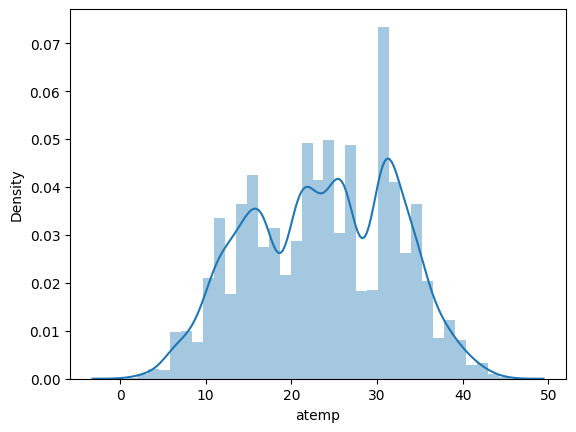

In [ ]:
sns.distplot(drop_df['atemp'])
plt.show()

<ipython-input-22-1d4ee299b2d3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(drop_df['windspeed'])


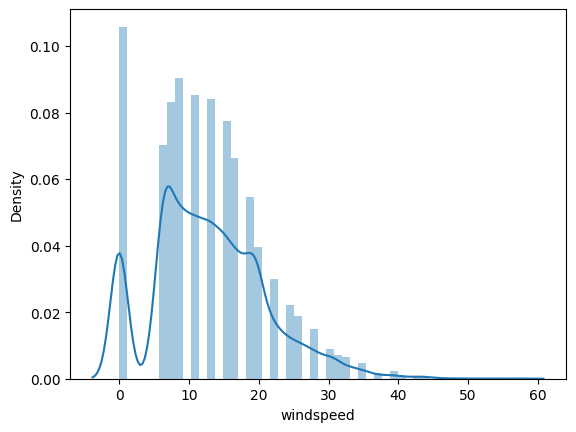

In [ ]:
sns.distplot(drop_df['windspeed'])
plt.show()

<ipython-input-23-107fb6d0f298>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(drop_df['humidity'])


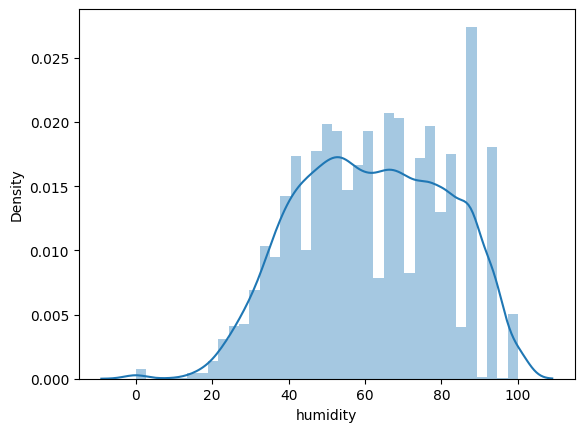

In [ ]:
sns.distplot(drop_df['humidity'])
plt.show()

### Anderson-Dariling 통계 진행


anderson darling 통계는 데이터가 특정 분포를 얼마나 잘 따르는지를 확인하고 싶을 때 사용한다.

보통 데이터의 개수가 5000개 미만일 경우에는 sharpiro-wilk 검정을 하고, 그 보다 개수가 많으면 anderson-darling 통계를  사용한다.

bike.csv 데이터는 5000개보다 많은 10886개의 데이터 수를 가지고 있으므로 Anderson darling 통계를 통해 정규성검정을 진행하였다. 

In [ ]:
import scipy.stats as stats


stats.anderson(drop_df['count'],dist = 'norm')


AndersonResult(statistic=358.3343766828657, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=191.57413191254824, scale=181.14445383028527)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:

stats.anderson(drop_df['temp'],dist = 'norm')

AndersonResult(statistic=67.80641770976945, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=20.23085981995223, scale=7.791589843987567)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
stats.anderson(drop_df['atemp'],dist = 'norm')

AndersonResult(statistic=66.92097954692144, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=23.655084052912, scale=8.474600626484948)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:

stats.anderson(drop_df['humidity'],dist = 'norm')

AndersonResult(statistic=51.13817812242996, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=61.88645967297446, scale=19.24503327739469)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:

stats.anderson(drop_df['windspeed'],dist = 'norm')

AndersonResult(statistic=98.05718887405055, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=12.7993954069447, scale=8.164537326838689)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

### categorical 변수들에 대한 EDA

categorical 변수들은 boxplot이나 정규성검정을 할 수 없기 때문에 간단하게 histogram으로 분포를 확인했다. 

<Axes: xlabel='season', ylabel='count'>

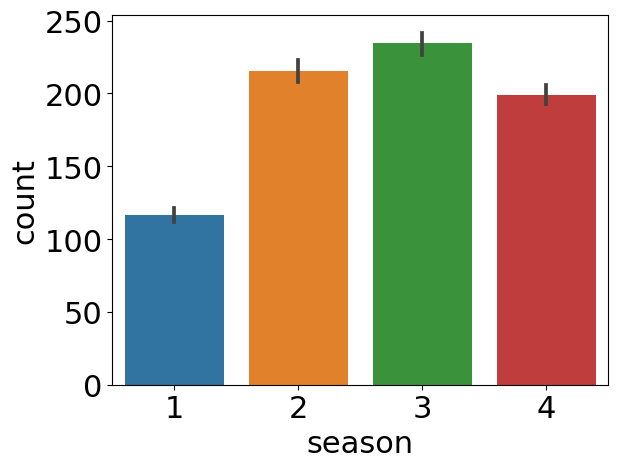

In [ ]:
sns.barplot(data=df[:len(drop_df)], x='season', y='count')


<Axes: xlabel='holiday', ylabel='count'>

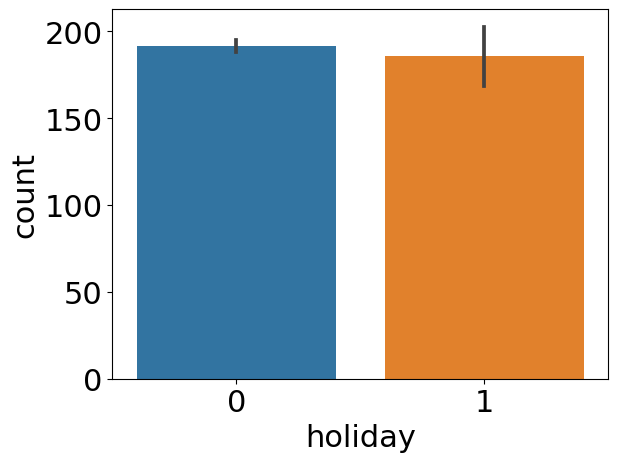

In [ ]:
# holiday, workingday, weather
sns.barplot(data=df[:len(drop_df)], x='holiday', y='count')

<Axes: xlabel='workingday', ylabel='count'>

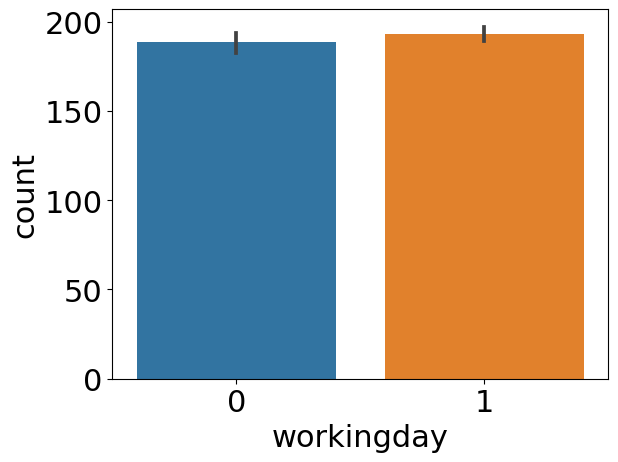

In [ ]:

sns.barplot(data=df[:len(drop_df)], x='workingday', y='count')

<Axes: xlabel='weather', ylabel='count'>

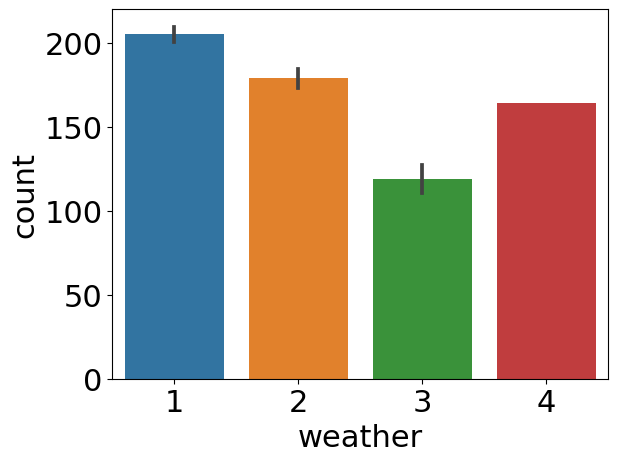

In [ ]:

sns.barplot(data=df[:len(drop_df)], x='weather', y='count')

### scatter plot 그리기

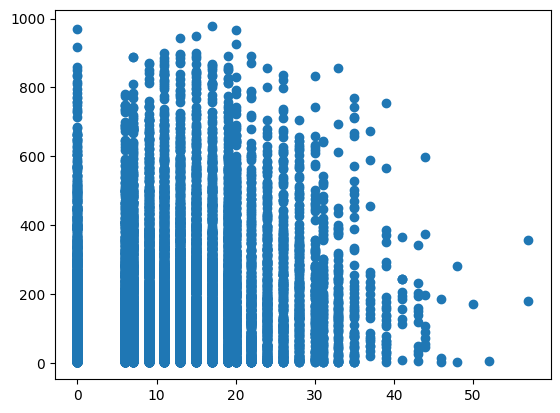

In [ ]:
plt.scatter(drop_df['windspeed'], drop_df['count'])
plt.show()

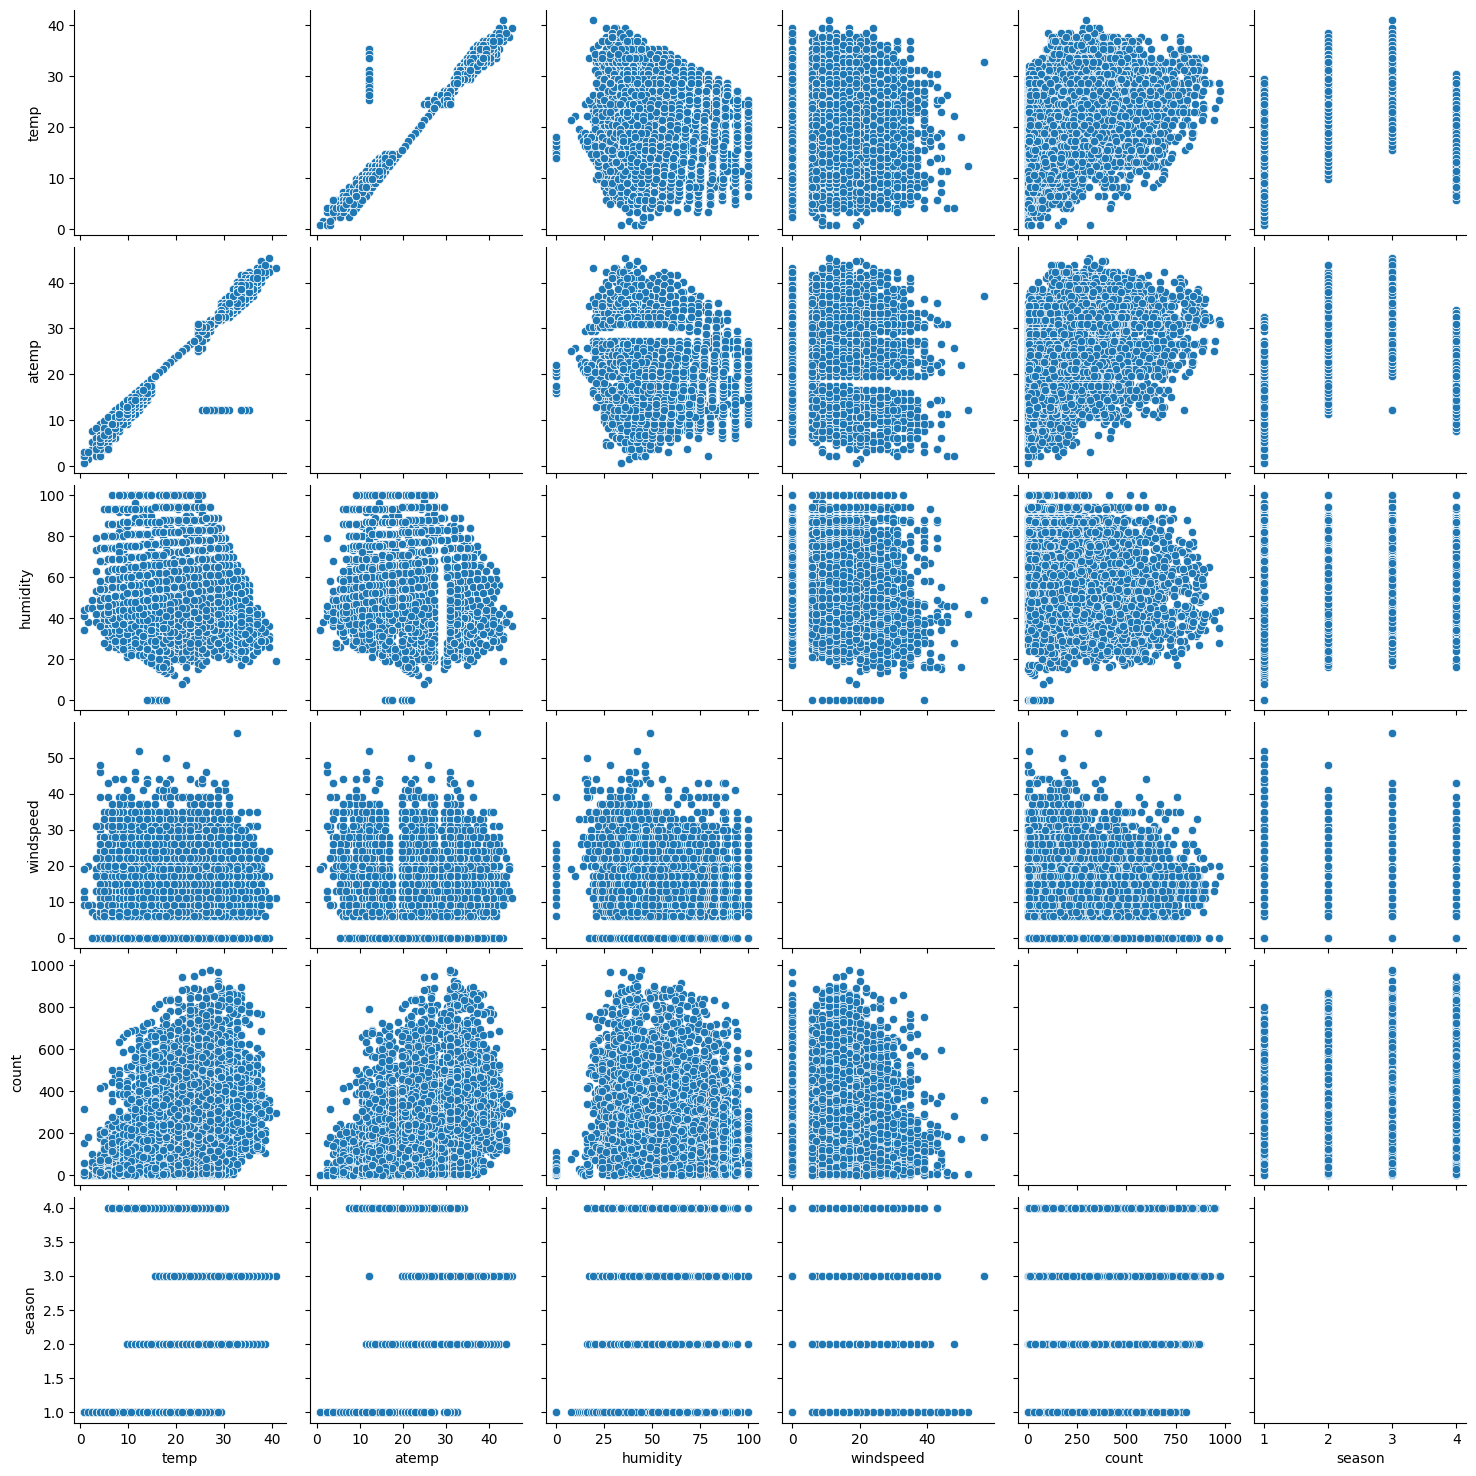

In [ ]:
# scatterplot matrix with histogram only for continuous variables

sns.pairplot(drop_df[['temp','atemp','humidity','windspeed','count','season']], diag_kind='reg')

plt.show()

#     0 season        1 holiday       1 workingday    0 weather    /     0 temp          0 atemp         0 humidity      0 windspeed     0 count  

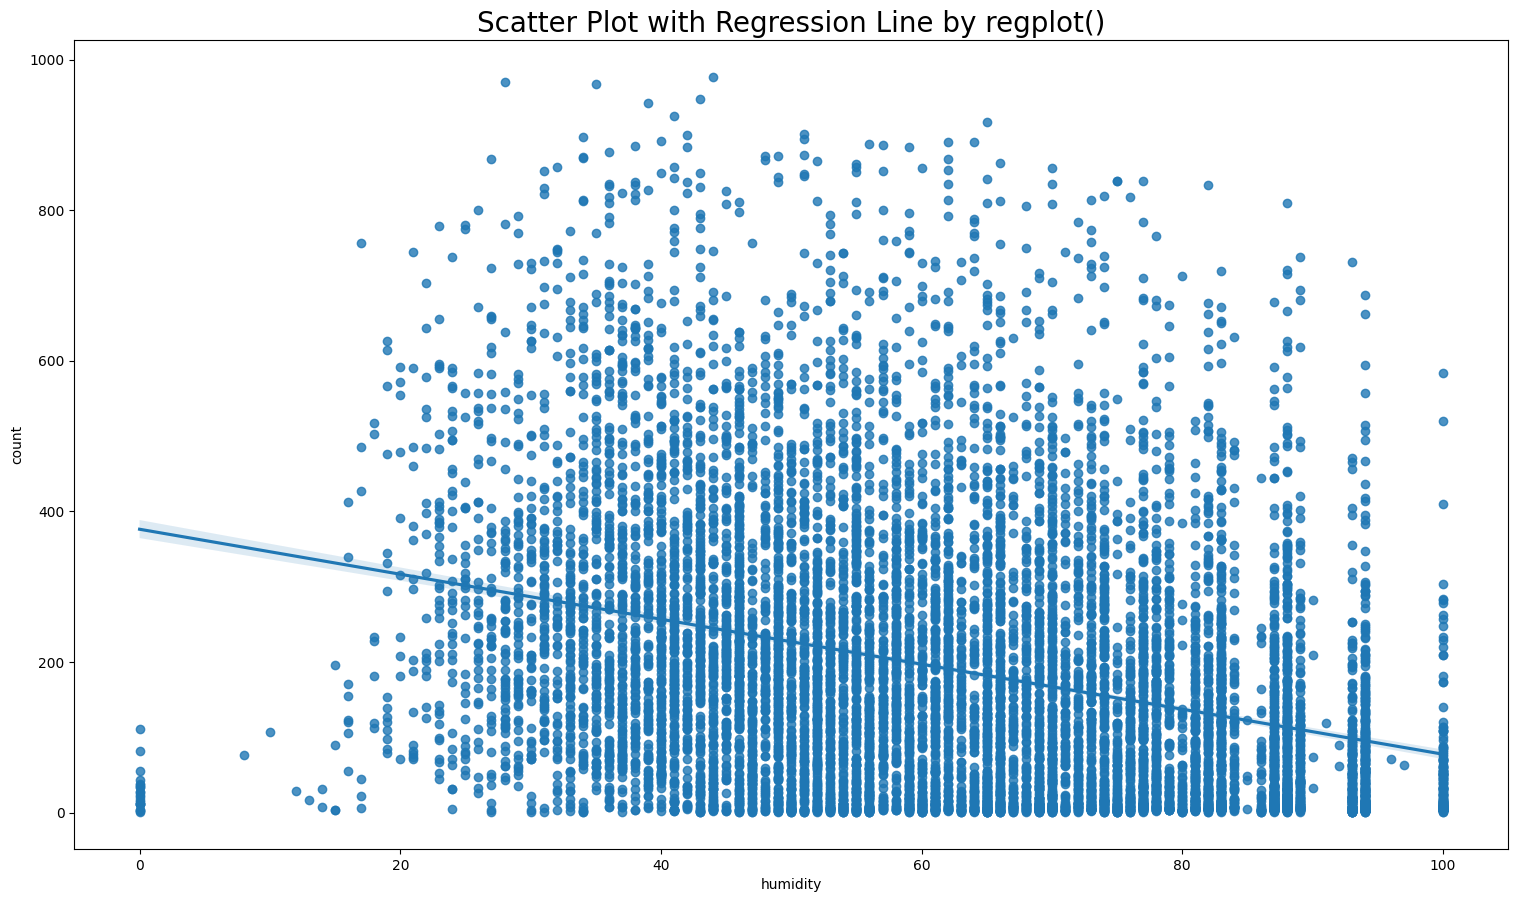

In [ ]:

 

# Scatter Plot with regression line by seaborn regplot()

g = sns.regplot(x=drop_df['humidity'], 

           y=drop_df['count'], 

           fit_reg=True) # default
g.figure.set_size_inches(18.5, 10.5)
plt.title('Scatter Plot with Regression Line by regplot()', fontsize=20)

plt.show()

### 상관관계 corr 계산

 두 연속형 변수의 사이의 연관성을 알아보는 상관분석을 진행하려 한다. 

 연속변수는 총 5개가 있으므로 

In [ ]:
cor = drop_df[['temp','atemp','humidity','windspeed','count']].corr()
cor.head()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


<Axes: >

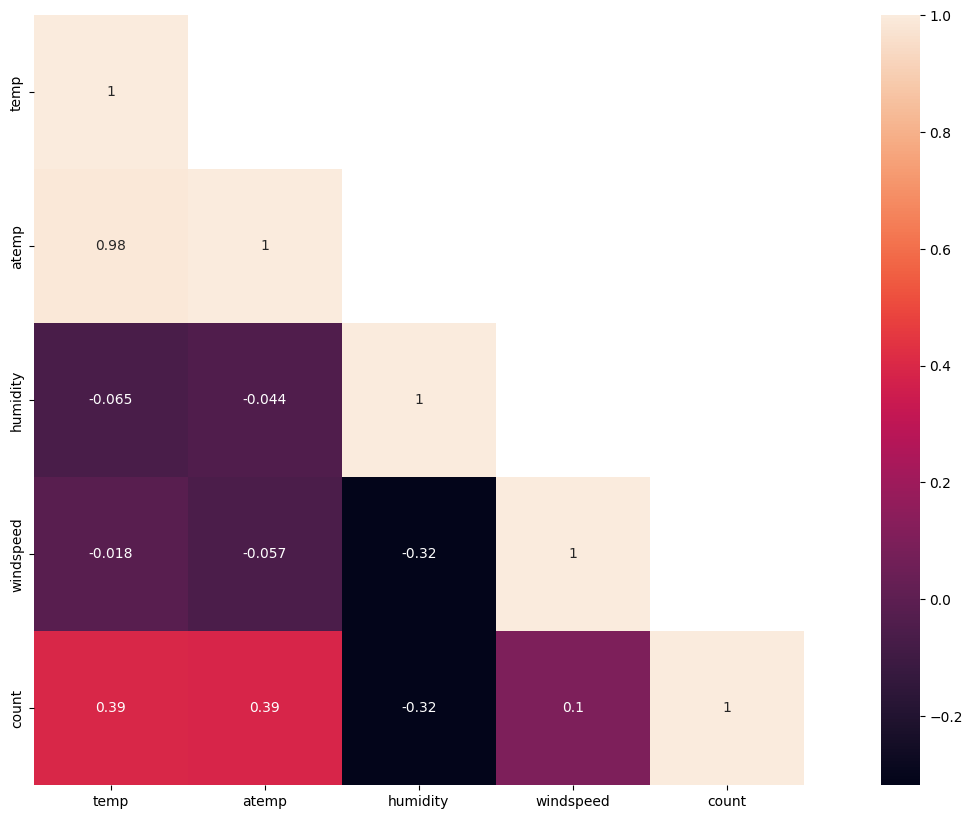

In [ ]:
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor,mask= mask,square=True,annot=True)

In [ ]:
'''
색깔이 연할수록 1에 가깝고, 보라색이 0.0, 검정색일수록 음에 가깝다.

temp와 atemp는 0.98의 corr를 보여주며 높은 양의 상관관계가 있음을 알 수 있었다.

그리고 target인 count와 높은 상관관계를 같은 column은 0.39의 양의 상관관계를 갖는 temp,atemp임을 알 수 있다. 





'''

### one hot encoding + split + MLR 모델 분석 + 5가지 실험 진행

adjusted R^2 / qq-plot, OLS 충족


In [ ]:
# categorical data에 대해 one hot encoding 진행
# 항목이 3개 이상인 데이터 season, weather 에 대해 진행한다.

df_ohe= pd.get_dummies(drop_df, columns = ['season', 'weather'])
df_ohe

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0000,16,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0000,40,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0000,32,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0000,13,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0000,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,336,0,0,0,1,1,0,0,0
10882,0,1,14.76,17.425,57,15.0013,241,0,0,0,1,1,0,0,0
10883,0,1,13.94,15.910,61,15.0013,168,0,0,0,1,1,0,0,0
10884,0,1,13.94,17.425,61,6.0032,129,0,0,0,1,1,0,0,0


In [ ]:
# atemp 제거 실험1)
df_ohe2 = df_ohe.drop(['atemp'],axis=1)
df_ohe2

,holiday,workingday,temp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,81,0.0000,16,1,0,0,0,1,0,0,0
1,0,0,9.02,80,0.0000,40,1,0,0,0,1,0,0,0
2,0,0,9.02,80,0.0000,32,1,0,0,0,1,0,0,0
3,0,0,9.84,75,0.0000,13,1,0,0,0,1,0,0,0
4,0,0,9.84,75,0.0000,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,50,26.0027,336,0,0,0,1,1,0,0,0
10882,0,1,14.76,57,15.0013,241,0,0,0,1,1,0,0,0
10883,0,1,13.94,61,15.0013,168,0,0,0,1,1,0,0,0
10884,0,1,13.94,61,6.0032,129,0,0,0,1,1,0,0,0


In [ ]:
# 실험2) 다중공선성 발생 문제 해결 

df_ohe2 = df_ohe.drop(['season_1','weather_1','atemp'],axis=1)
df_ohe2

,holiday,workingday,temp,humidity,windspeed,count,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,0,0,9.84,81,0.0000,16,0,0,0,0,0,0
1,0,0,9.02,80,0.0000,40,0,0,0,0,0,0
2,0,0,9.02,80,0.0000,32,0,0,0,0,0,0
3,0,0,9.84,75,0.0000,13,0,0,0,0,0,0
4,0,0,9.84,75,0.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,50,26.0027,336,0,0,1,0,0,0
10882,0,1,14.76,57,15.0013,241,0,0,1,0,0,0
10883,0,1,13.94,61,15.0013,168,0,0,1,0,0,0
10884,0,1,13.94,61,6.0032,129,0,0,1,0,0,0


In [ ]:
# 실험3) workingday, holiday 제거

df_ohe3 = df_ohe.drop(['season_1','weather_1','atemp','workingday','holiday'],axis=1)
df_ohe3

,temp,humidity,windspeed,count,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,9.84,81,0.0000,16,0,0,0,0,0,0
1,9.02,80,0.0000,40,0,0,0,0,0,0
2,9.02,80,0.0000,32,0,0,0,0,0,0
3,9.84,75,0.0000,13,0,0,0,0,0,0
4,9.84,75,0.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
10881,15.58,50,26.0027,336,0,0,1,0,0,0
10882,14.76,57,15.0013,241,0,0,1,0,0,0
10883,13.94,61,15.0013,168,0,0,1,0,0,0
10884,13.94,61,6.0032,129,0,0,1,0,0,0


In [ ]:
# 실험4) windspeed 0.0값을 평균값인 14.5549로 대치

df_ohe2.loc[df_ohe2['windspeed'] == 0.0000, 'windspeed'] = 14.5549
df_ohe2

,temp,humidity,windspeed,count,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,9.84,81,14.5549,16,0,0,0,0,0,0
1,9.02,80,14.5549,40,0,0,0,0,0,0
2,9.02,80,14.5549,32,0,0,0,0,0,0
3,9.84,75,14.5549,13,0,0,0,0,0,0
4,9.84,75,14.5549,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
10881,15.58,50,26.0027,336,0,0,1,0,0,0
10882,14.76,57,15.0013,241,0,0,1,0,0,0
10883,13.94,61,15.0013,168,0,0,1,0,0,0
10884,13.94,61,6.0032,129,0,0,1,0,0,0


In [ ]:
# 실험4-1) windspeed 0.0값을 갖는 행을 모두 제거

df_ohe3.drop(df_ohe3[(df_ohe3['windspeed'] ==0.0000)].index, inplace=True)
df_ohe3

,temp,humidity,windspeed,count,season_2,season_3,season_4,weather_2,weather_3,weather_4
5,9.84,75,6.0032,1,0,0,0,1,0,0
10,15.58,76,16.9979,36,0,0,0,0,0,0
11,14.76,81,19.0012,56,0,0,0,0,0,0
12,17.22,77,19.0012,84,0,0,0,0,0,0
13,18.86,72,19.9995,94,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
10881,15.58,50,26.0027,336,0,0,1,0,0,0
10882,14.76,57,15.0013,241,0,0,1,0,0,0
10883,13.94,61,15.0013,168,0,0,1,0,0,0
10884,13.94,61,6.0032,129,0,0,1,0,0,0


In [ ]:
# 실험5) p-value가 높게 나온 season_2, weather_3, weather_4 제거

df_ohe5 = df_ohe4.drop(['season_2','weather_3','weather_4'],axis=1)
df_ohe5

,temp,humidity,count,season_3,season_4,weather_2
5,9.84,75,1,0,0,1
10,15.58,76,36,0,0,0
11,14.76,81,56,0,0,0
12,17.22,77,84,0,0,0
13,18.86,72,94,0,0,1
...,...,...,...,...,...,...
10881,15.58,50,336,0,1,0
10882,14.76,57,241,0,1,0
10883,13.94,61,168,0,1,0
10884,13.94,61,129,0,1,0


In [ ]:
# train과 test로 분리
from sklearn.model_selection import train_test_split
seed = 12345
test_size = 0.3
#test_data = train_test_split(df_ohe,test_size=test_size,random_state=seed)

X_train, X_test = train_test_split(df_ohe2,test_size=test_size,random_state=seed)

In [ ]:
# input, output variables in numpy array

x_trn = X_train.drop('count',axis=1).iloc[:,:].to_numpy()
y_trn = X_train['count'].to_numpy()

# model setting
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()

# Train the model with trainset
mlr.fit(x_trn,y_trn)

# Get R-squared value
mlr.score(x_trn,y_trn)

0.286520250204922

### OLS 검증

In [ ]:
# calculate residuals
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

    # 실제값과 예측값의 차이를 확인

Assumption : Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


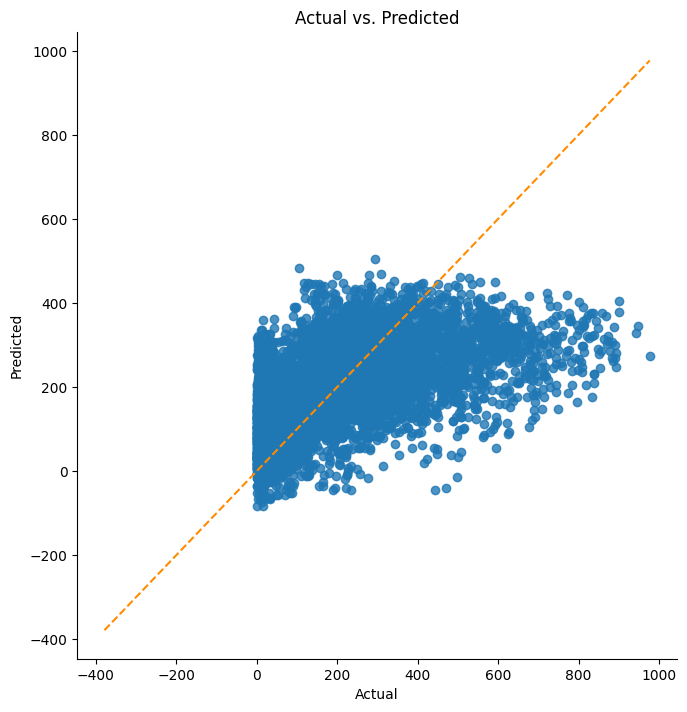

In [ ]:
# Linear assumption
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption : Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7) #size -> height 
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()
linear_assumption(mlr,x_trn,y_trn)

# 정의한 학습이 완료된 모델, 입력변수, 출력변수 

Assumption : The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


<ipython-input-98-c790fc693485>:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_results['Residuals'])


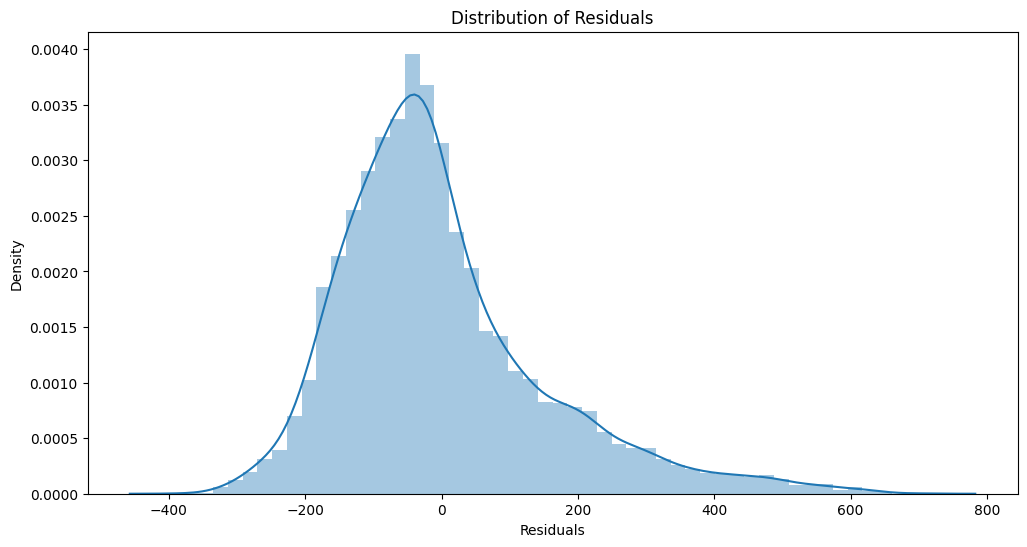


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [ ]:
# Noramlity of the error terms

# 잔차들의 정규성을 확인
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption : The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

normal_errors_assumption(mlr,x_trn,y_trn)

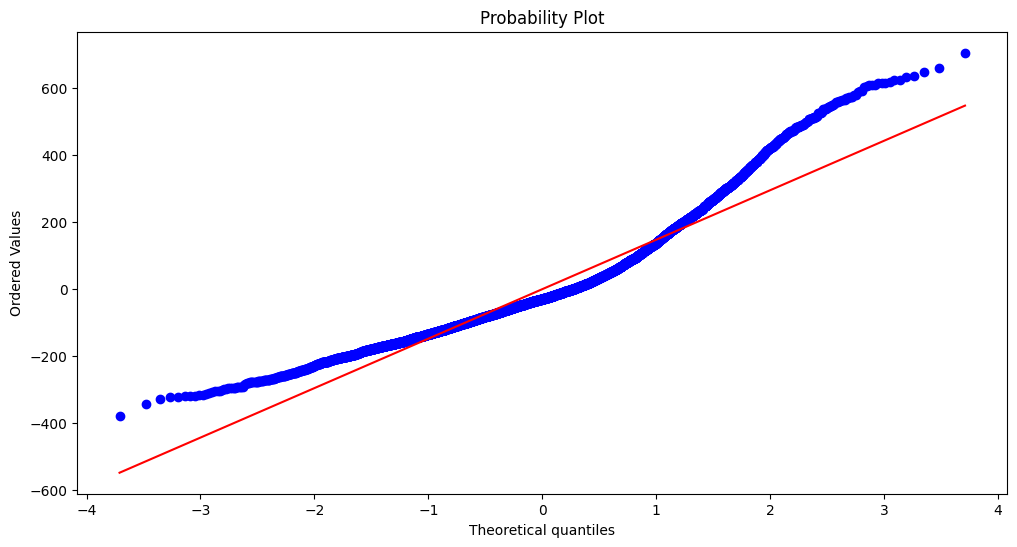

In [ ]:
# QQPlot
import scipy.stats as stats

def QQplot(model,features,label):
    """
    Normality using QQplot
    """
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('QQplot')
    stats.probplot(df_results['Residuals'],dist=stats.norm, plot=plt)
    plt.show()

QQplot(mlr, x_trn,y_trn)

# 모두 입력 인자들이 동일하도록 설정

In [ ]:
# No autocorrelation of the error terms

def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption : No Autocorrelation in the residuals', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals']) # 잔차에 함수입력
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

autocorrelation_assumption(mlr,x_trn,y_trn)

# statsmodels에서 durbin_watson 함수를 가져옴

# 1.5~2.5 사이에 있응ㄹ 때 autocorrelation이 없음을 확인

Assumption : No Autocorrelation in the residuals 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.0019398726000506
Little to no autocorrelation 

Assumption satisfied


Assumption : Homoscedasticity of Error Terms(Error terms have the same variance) 

Residuals should have relative constant variance


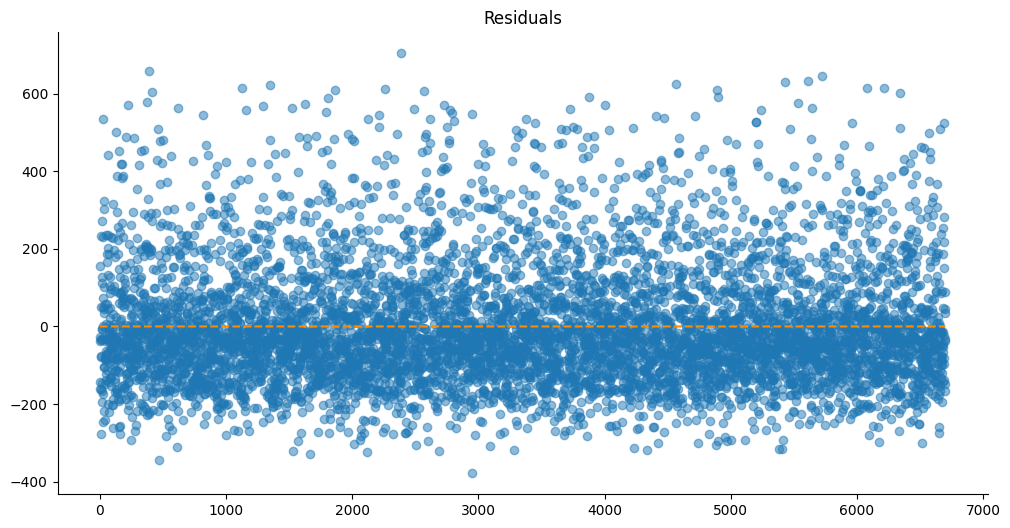

In [ ]:
# Same variance within error terms

def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption : Homoscedasticity of Error Terms(Error terms have the same variance)', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()

homoscedasticity_assumption(mlr,x_trn,y_trn)

# 잔차들이 동일한 분산을 가지고 있는지 함수로 확인 



Assumption : Little to no multicollinearity among predictors


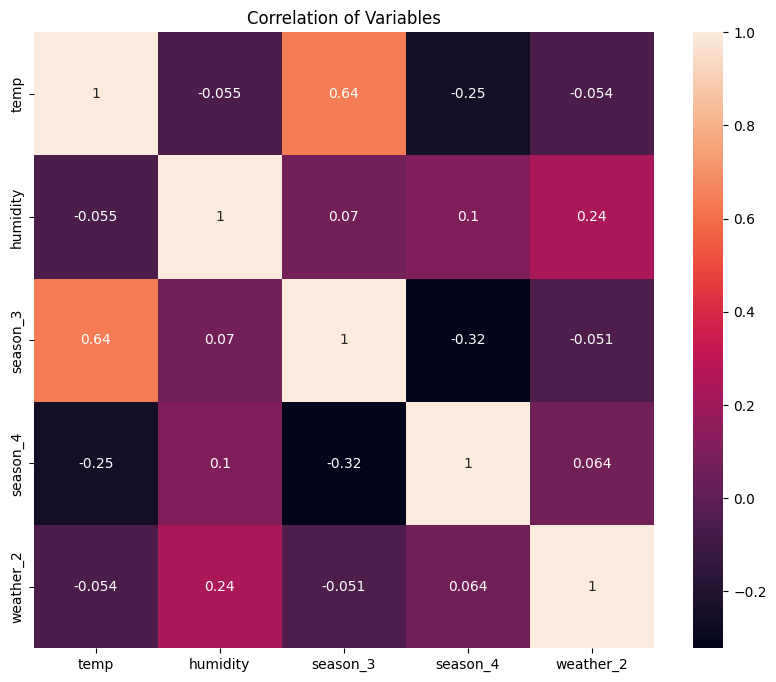

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
temp: 6.716320263514924
humidity: 6.014414530806133
season_3: 2.1159199637943598
season_4: 1.474707062402189
weather_2: 1.4411271451622227

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [ ]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption : Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

feature_names = X_train.drop('count',axis=1).columns[:]
multicollinearity_assumption(mlr,x_trn,y_trn,feature_names)

#VIR을 통해 다중공산성 확인

# 변수 이름을 추가로 입력값 사용

### 성능지표 확인

In [ ]:
from typing import Union
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE


def perf_eval_reg(y_true: Union[np.array,list], y_pred: Union[np.array,list])->list:
    """
    Input:
    y_true : ndarray of shape (n_samples,)
    y_pred : ndarray of shape (n_samples,)

    Return:
    [rmse,mae,mape]: scores of regression in a list
    """
    
    rmse = MSE(y_true,y_pred,squared=False)#squared를 True로 설정시 MSE 값 출력, False로 설정시 RMSE 값 출력
    mae = MAE(y_true,y_pred)
    mape = MAPE(y_true,y_pred)

    return [rmse,mae,mape]

In [ ]:
import pandas as pd

def display_result(result_dict: dict, dataset_names: list, metric_names: list):
    """
    Input:
    result_dict : 데이터 셋 별 Regression 평가 결과 저장한 dictionary
    ex) {'Toyota Corolla':[0.1,0.5,0.3],...}
    
    dataset_names : 데이터 셋 이름 List
    ex) ['Toyota Corolla','Boston Housing']

    metric_names : Regression 평가 지표 이름 List
    ex) ['RMSE','MAE','MAPE']
    """
    result_df = pd.DataFrame(result_dict).T
    result_df.index = dataset_names
    result_df.columns = metric_names
    
    display(result_df)

result_dict= {}

In [ ]:
# Performance Measure
x_test = X_test.drop('count',axis=1).iloc[:,:]
y_test = X_test['count']

y_pred = mlr.predict(x_test)
result_dict['bike'] = perf_eval_reg(y_test,y_pred)
dataset_names = ['bike']
metric_names = ['RMSE','MAE','MAPE']
display_result(result_dict, dataset_names, metric_names)

'''
Q8.
해석 
회귀에서는 상대적으로 평가지표를 비교할 수 있다.
한가지 가능한 해석은 MAPE에 따르면 498%의 오차가 있다라는 것이다. - 데이터셋에 부적합할 수 있음

-> 이건 더 찾아봐야 할듯 애매함

'''

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,RMSE,MAE,MAPE
bike,157.405916,117.853994,4.446813


'\nQ8.\n해석 \n회귀에서는 상대적으로 평가지표를 비교할 수 있다.\n한가지 가능한 해석은 MAPE에 따르면 498%의 오차가 있다라는 것이다. - 데이터셋에 부적합할 수 있음\n\n-> 이건 더 찾아봐야 할듯 애매함\n\n'

### R-squared / adj R-squared 확인

In [ ]:
X = X_train.drop('count',axis=1)
y = X_train[['count']]

# 상수항 추가
X = sm.add_constant(X, has_constant="add")
X.head()

,const,temp,humidity,season_2,season_3,season_4,weather_2,weather_3,weather_4
10030,1.0,13.12,49,0,0,1,1,0,0
5780,1.0,5.74,46,0,0,0,0,0,0
3997,1.0,21.32,72,0,1,0,1,0,0
2176,1.0,25.42,73,1,0,0,0,0,0
8996,1.0,26.24,73,0,1,0,0,0,0


In [ ]:
# 모델 fit
model = sm.OLS(y, X)
result_model = model.fit()
result_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     336.5
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:35:23   Log-Likelihood:                -43240.
No. Observations:                6701   AIC:                         8.650e+04
Df Residuals:                    6692   BIC:                         8.656e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.0173      9.397     13.517      0.000     108.596     145.438
temp          11.4252      0.402     28.439      0.000      10.638      12.213
humidity      -2.8307      0.114    -24.839      0.000      -3.054      -2.607
season_2       2.2443      6.733      0.333      0.739     -10.955      15.443
season_3     -38.0675      8.625     -4.414      0.000     -54.975     -21.160
season_4      67.2471      5.737     11.722      0.000      56.001      78.493
weather_2     13.4150      4.596      2.919      0.004       4.405      22.425
weather_3    -10.3812      7.542     -1.376      0.169     -25.167       4.404
weather_4    186.7356    153.733      1.215      0.225    -114.630     488.101
==============================================================================
Omnibus:                     1235.611   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2291.492
Skew:                           1.149   Prob(JB):                         0.00
Kurtosis:                       4.712   Cond. No.                     5.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""